Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


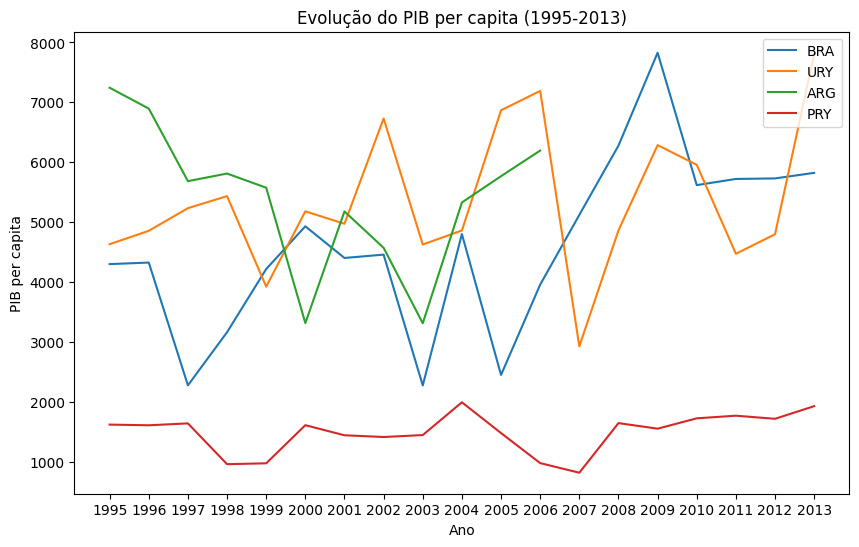

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

def mount_drive():
    drive.mount('/content/gdrive')

def load_data(caminho, conjunto_de_dados):
    caminho_conjunto_de_dados = caminho + conjunto_de_dados
    dados_banco = pd.read_csv(caminho_conjunto_de_dados, sep=';', decimal=',')
    return dados_banco

def filter_data(dados_banco, paises_conesul, colunas):
    dados_conesul = dados_banco[dados_banco['Country Code'].isin(paises_conesul)]
    pib_per_capita = dados_conesul[dados_conesul['Indicator Name'].str.contains('GDP per capita')][colunas]
    return pib_per_capita

def plot_data(pib_per_capita, paises_conesul, anos):
    plt.figure(figsize=(10,6))
    for pais in paises_conesul:
        dados_pais = pib_per_capita[pib_per_capita['Country Code'] == pais]
        plt.plot(anos, dados_pais[anos].values[0], label=pais)

    plt.xlabel('Ano')
    plt.ylabel('PIB per capita')
    plt.title('Evolução do PIB per capita (1995-2013)')
    plt.legend()
    plt.show()

# Configurações
caminho = '/content/gdrive/MyDrive/'
conjunto_de_dados = 'dataset_bancomundial_22.csv'
paises_conesul = ['BRA', 'URY', 'ARG', 'PRY']
anos = [str(ano) for ano in range(1995, 2014)]
colunas = ['Country Name', 'Country Code'] + anos

mount_drive()
dados_banco = load_data(caminho, conjunto_de_dados)
pib_per_capita = filter_data(dados_banco, paises_conesul, colunas)
plot_data(pib_per_capita, paises_conesul, anos)
